> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate Indicators from the Gapminder Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In this report, I will analyze 3 indicators of the Gapminder Dataset which contains the evolution of those indicators for many countries each year since 1800:
* C02 emmissions per person
* Life expectancy
* Income per person (GDP per capita)

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load CO2 csv file into a Pandas DataFrame
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv', index_col='country')
print(df_co2.info())
df_co2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 330.0+ KB
None


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400,3.28,3.270,3.430,3.48,3.680,3.800,3.640,3.560,3.690
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120


In [3]:
# Load Income csv file into a Pandas DataFrame
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv', index_col='country')
print(df_income.info())
df_income.head()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Columns: 241 entries, 1800 to 2040
dtypes: int64(241)
memory usage: 364.9+ KB
None


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
Albania,667,667,667,667,667,668,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
Algeria,715,716,717,718,719,720,721,722,723,724,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73600,75100,76700,78300,79800,81500,83100,84800,86500,88300
Angola,618,620,623,626,628,631,634,637,640,642,...,6110,6230,6350,6480,6610,6740,6880,7020,7160,7310


In [4]:
# Load Life Expectency csv file into a Pandas DataFrame
df_life_exp = pd.read_csv('life_expectancy_years.csv', index_col='country')
print(df_life_exp.info())
df_life_exp.head()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: float64(301)
memory usage: 441.2+ KB
None


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


* We can notice that there are a lot of missing data for the CO2 indicator in the first years
* We can notice that the life expectency indicator is missing for many years for some countries and goes in the furture
* We can notice that the income indicator has values for years in the future
* We can notice that all indicators are in the float64 format
* We can notice that each dataframe doesn't have the same number of countries (index)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
import data_cleaning as clean

clean.columns2Int(df_co2)
clean.removeYearsInFuture(df_co2)
clean.fillNaN(df_co2)
print(df_co2.info())
df_co2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 330.0+ KB
None


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00192,0.00192,0.00192,0.00192,0.00192,0.00192,0.00192,0.00192,0.00192,0.00192,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
Albania,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
Algeria,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.400,3.28,3.270,3.430,3.48,3.680,3.800,3.640,3.560,3.690
Andorra,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
Angola,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120


In [6]:
clean.columns2Int(df_income)
clean.removeYearsInFuture(df_income)
clean.fillNaN(df_income)
df_income = clean.values2Float(df_income)
print(df_income.info())
df_income.head()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 331.7+ KB
None


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1500.0,1670.0,1630.0,1770.0,1810.0,1800.0,1770.0,1760.0,1760.0,1740.0
Albania,667.0,667.0,667.0,667.0,667.0,668.0,668.0,668.0,668.0,668.0,...,9520.0,9930.0,10200.0,10400.0,10500.0,10700.0,11000.0,11400.0,11800.0,12300.0
Algeria,715.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,...,12700.0,12900.0,13000.0,13200.0,13300.0,13500.0,13800.0,13900.0,13900.0,13900.0
Andorra,1200.0,1200.0,1200.0,1200.0,1210.0,1210.0,1210.0,1210.0,1220.0,1220.0,...,41700.0,39000.0,42000.0,41900.0,43700.0,44900.0,46600.0,48200.0,49800.0,51500.0
Angola,618.0,620.0,623.0,626.0,628.0,631.0,634.0,637.0,640.0,642.0,...,6290.0,6360.0,6350.0,6640.0,6730.0,6810.0,6640.0,6260.0,6040.0,5720.0


In [7]:
clean.columns2Int(df_life_exp)
clean.removeYearsInFuture(df_life_exp)
clean.fillNaN(df_life_exp)
print(df_life_exp.info())
df_life_exp.head()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 321.4+ KB
None


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,59.3,59.9,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,77.5,77.6,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.1,76.3,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.9
Andorra,75.5,75.5,75.5,75.5,75.5,75.5,75.5,75.5,75.5,75.5,...,82.2,82.3,82.4,82.4,82.5,82.5,82.6,82.7,82.7,82.7
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.1,59.9,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [8]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
years_to_plot = np.array([1800, 1850, 1900, 1950, 2000, 2018])
countries_to_plot = ['Australia', 'Brazil', 'Burkina Faso', 'China', 'France', 'Iraq', 'United States']

CO2 Emission exploration

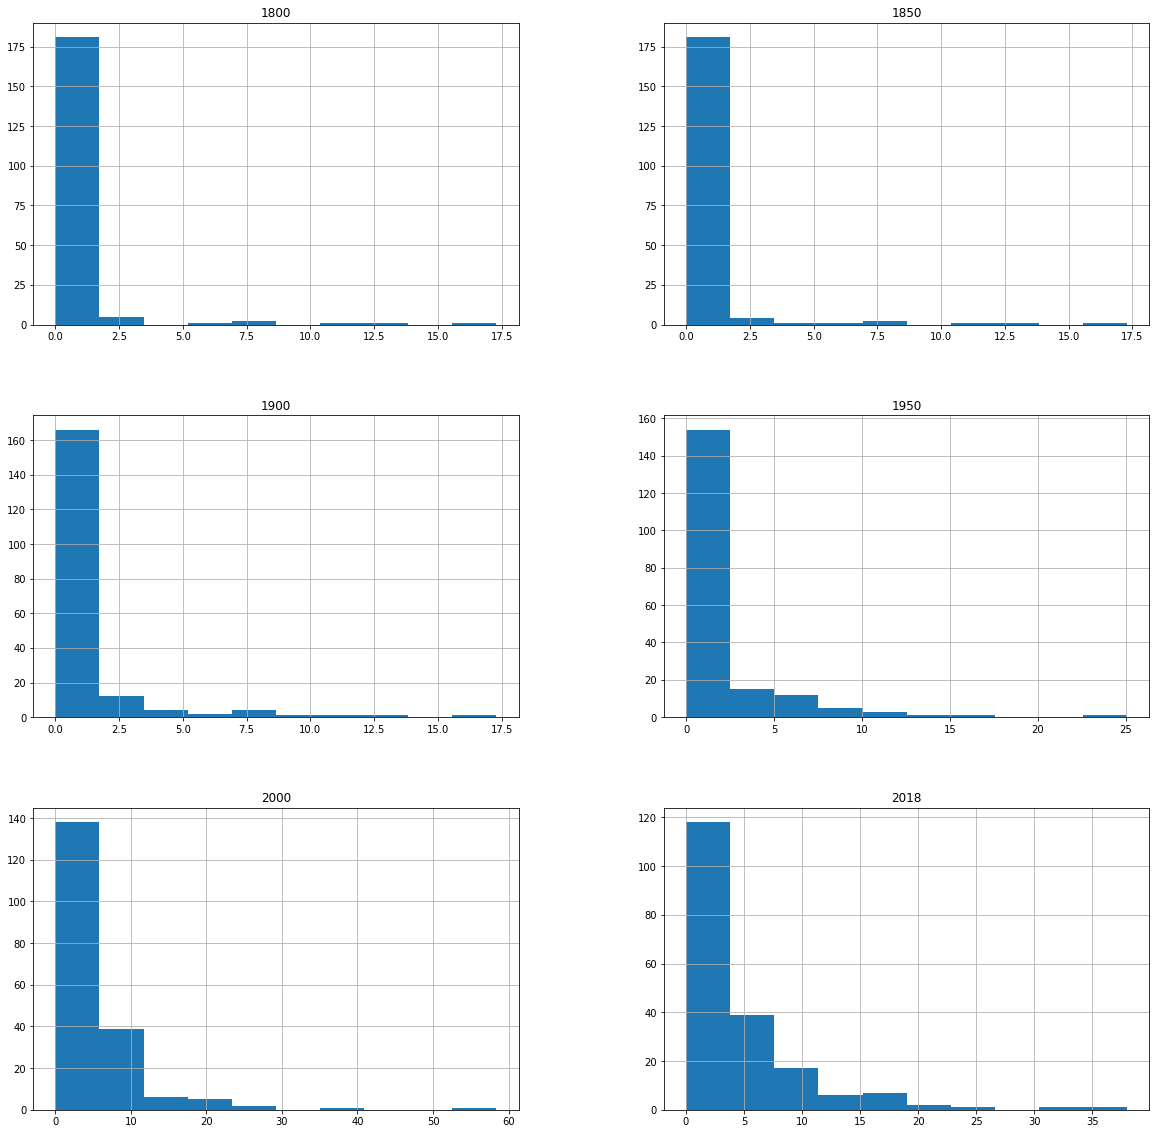

In [9]:
df_co2[years_to_plot].hist(figsize=(20,20));

In [10]:
df_co2[years_to_plot].describe()

,1800,1850,1900,1950,2000,2018
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.524797,0.550436,0.910708,1.761765,4.524371,4.455041
std,1.909994,1.925194,2.252759,3.286148,6.760072,5.609198
min,0.000000,0.000000,0.000000,0.000000,0.019000,0.024300
25%,0.004585,0.004585,0.020825,0.073225,0.492750,0.669250
50%,0.040950,0.042650,0.106000,0.385000,1.990000,2.530000
75%,0.177500,0.209750,0.604250,1.665000,6.457500,5.925000
max,17.300000,17.300000,17.300000,25.100000,58.400000,38.000000


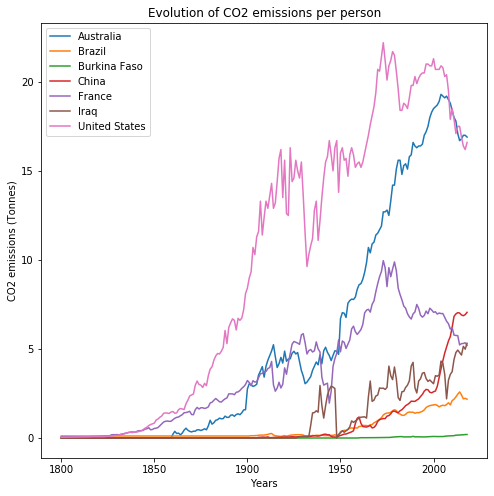

In [11]:
fig = plt.figure(figsize=(8, 8))

for country in countries_to_plot:
    plt.plot(df_co2.columns, df_co2.loc[country], label=country);
plt.legend();
plt.title("Evolution of CO2 emissions per person");
plt.xlabel("Years");
plt.ylabel("CO2 emissions (Tonnes)");

In [12]:
df_co2.loc[countries_to_plot].transpose().describe()

country,Australia,Brazil,Burkina Faso,China,France,Iraq,United States
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,5.528219,0.517873,0.020800,0.782234,3.561421,1.022637,9.779812
std,6.426208,0.665737,0.041616,1.637011,2.843197,1.521417,7.865244
min,0.000000,0.087800,0.000780,0.000230,0.067300,0.000000,0.042200
25%,0.000000,0.114000,0.000780,0.000240,0.848500,0.000000,1.310000
50%,3.420000,0.126000,0.000780,0.035900,3.030000,0.000000,11.200000
75%,9.580000,0.701000,0.018800,0.679500,5.840000,2.290000,16.450000
max,19.300000,2.590000,0.198000,7.060000,9.960000,5.320000,22.200000


CO2 evolution Analysis

Income exploration

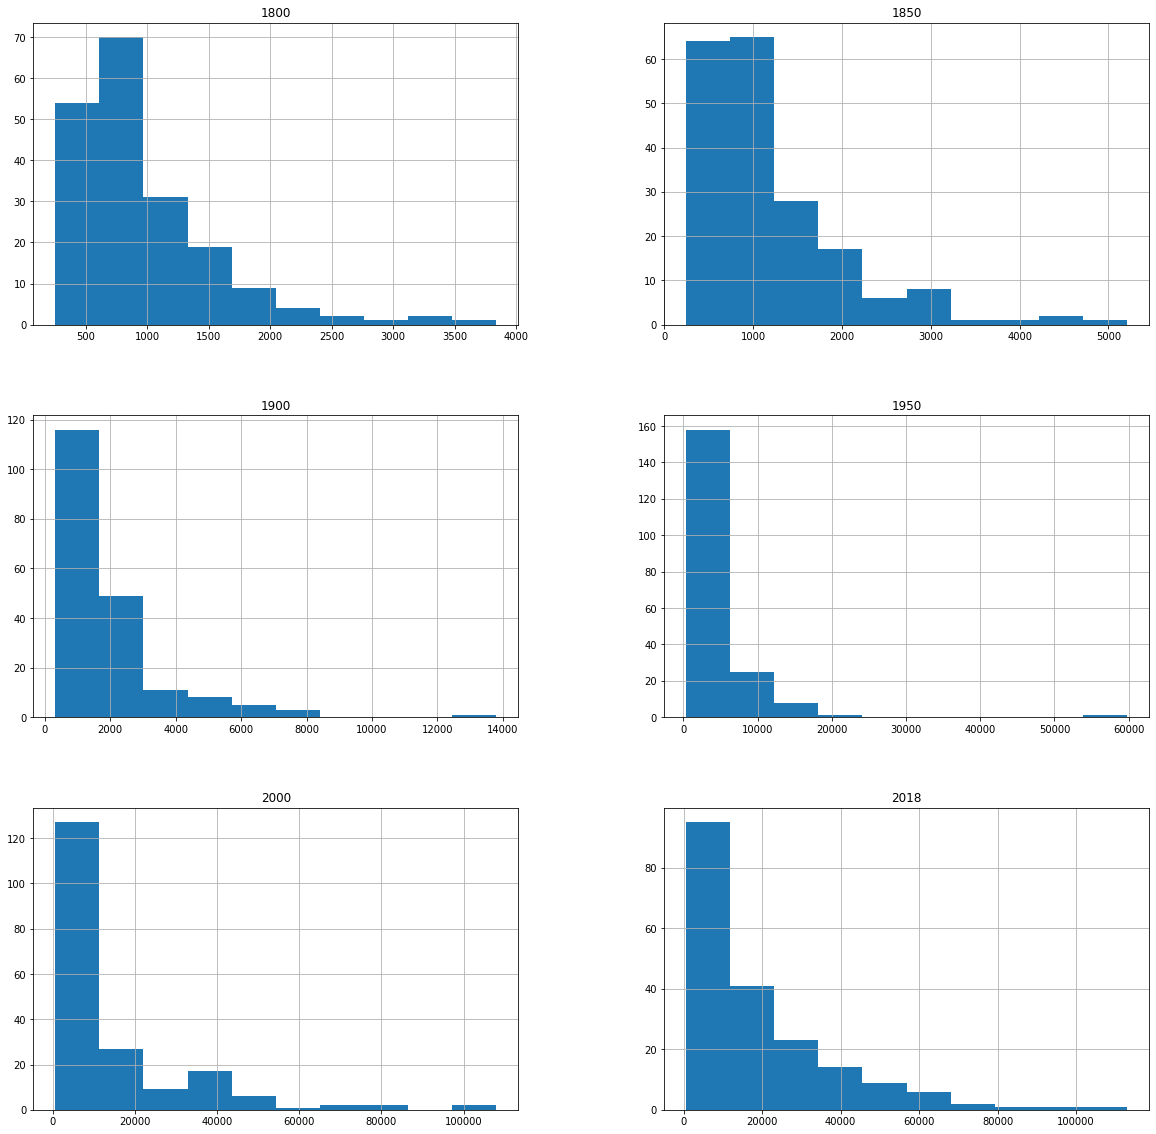

In [13]:
df_income[years_to_plot].hist(figsize=(20,20));

In [14]:
df_income[years_to_plot].describe()

,1800,1850,1900,1950,2000,2018
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,978.419689,1202.088083,1897.823834,4019.326425,14235.901554,18462.658031
std,579.466695,805.683249,1703.220938,5378.751466,18512.580390,19615.694741
min,250.000000,246.000000,318.000000,345.000000,573.000000,629.000000
25%,592.000000,664.000000,845.000000,1350.000000,2710.000000,3740.000000
50%,817.000000,933.000000,1250.000000,2580.000000,7220.000000,12100.000000
75%,1160.000000,1450.000000,2250.000000,4500.000000,16300.000000,27100.000000
max,3840.000000,5210.000000,13800.000000,59800.000000,108000.000000,113000.000000


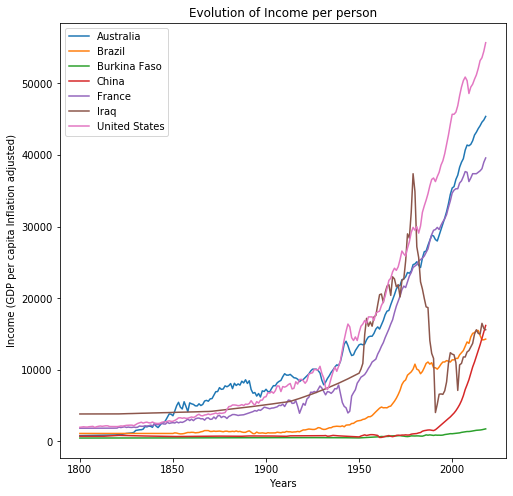

In [15]:
fig = plt.figure(figsize=(8, 8))

for country in countries_to_plot:
    plt.plot(df_income.columns, df_income.loc[country], label=country);
plt.legend();
plt.title("Evolution of Income per person");
plt.xlabel("Years");
plt.ylabel("Income (GDP per capita Inflation adjusted)");

In [16]:
df_income.loc[countries_to_plot].transpose().describe()

country,Australia,Brazil,Burkina Faso,China,France,Iraq,United States
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,12672.045662,3847.762557,643.114155,1593.757991,10539.315068,8759.086758,14263.378995
std,11862.548217,4233.670412,271.616957,2626.663611,11470.583197,6832.529458,15163.910727
min,817.000000,1060.000000,480.000000,560.000000,1850.000000,3840.000000,1960.000000
25%,4840.000000,1120.000000,499.500000,732.500000,2725.000000,4080.000000,3245.000000
50%,8480.000000,1430.000000,525.000000,772.000000,4760.000000,5380.000000,7430.000000
75%,17300.000000,4710.000000,688.500000,850.500000,14150.000000,10950.000000,19900.000000
max,45400.000000,15500.000000,1760.000000,16200.000000,39600.000000,37400.000000,55700.000000


Income analysis

Life expectency exploration

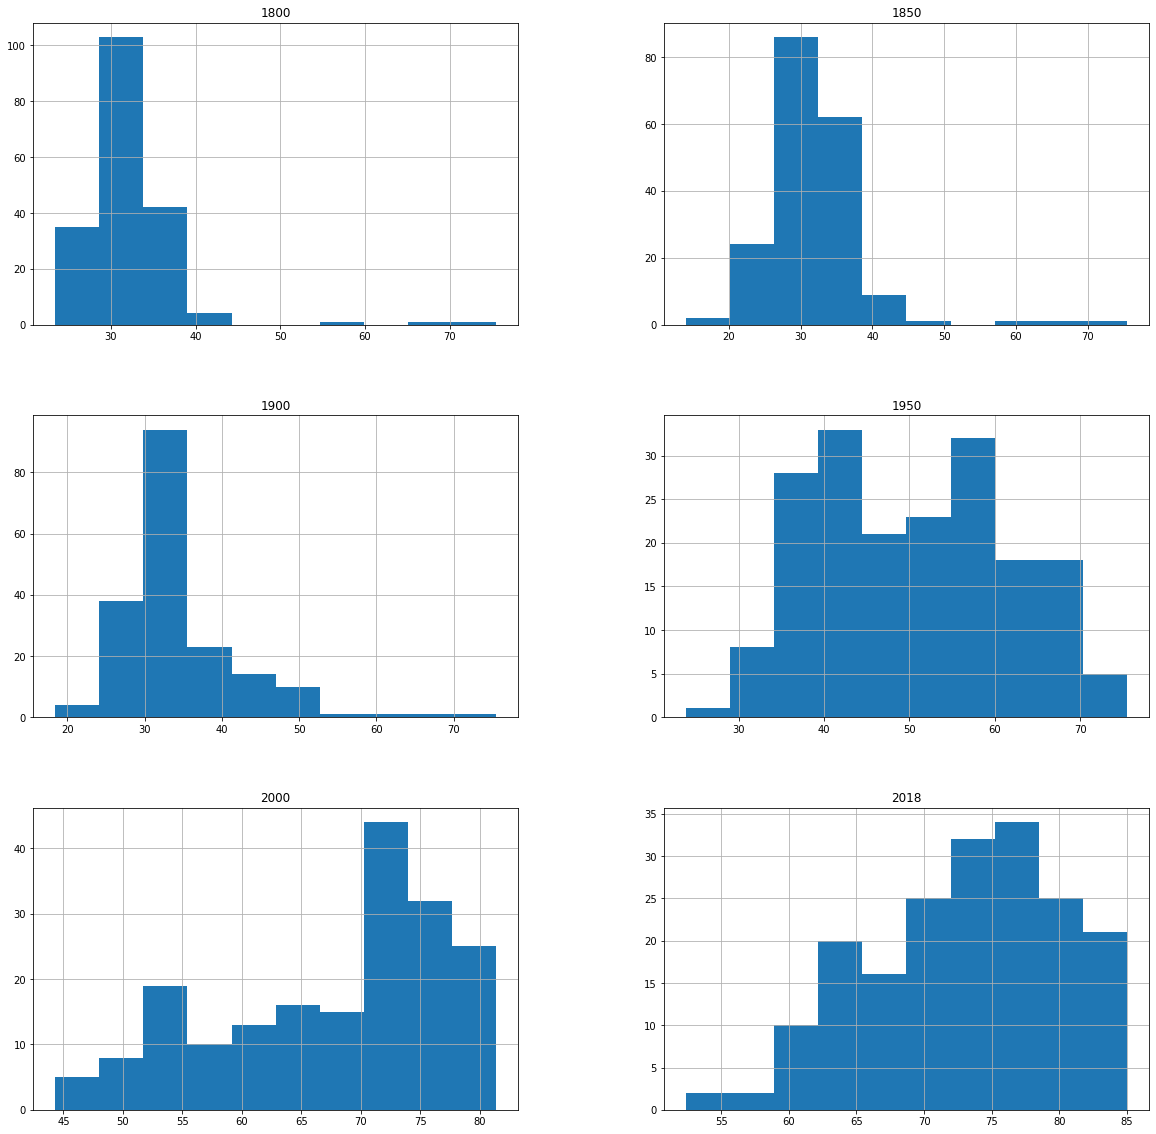

In [17]:
df_life_exp[years_to_plot].hist(figsize=(20,20));

In [18]:
df_life_exp[years_to_plot].describe()

,1800,1850,1900,1950,2000,2018
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,32.080749,32.241711,34.155080,50.362567,67.486096,72.974866
std,5.971964,6.550874,7.650435,11.281457,9.517975,6.975661
min,23.400000,14.000000,18.400000,23.800000,44.300000,52.400000
25%,29.150000,29.200000,30.250000,40.950000,60.550000,68.100000
50%,31.800000,31.900000,32.700000,50.400000,71.100000,74.100000
75%,34.000000,34.100000,35.700000,59.150000,74.500000,78.350000
max,75.500000,75.500000,75.500000,75.500000,81.400000,85.000000


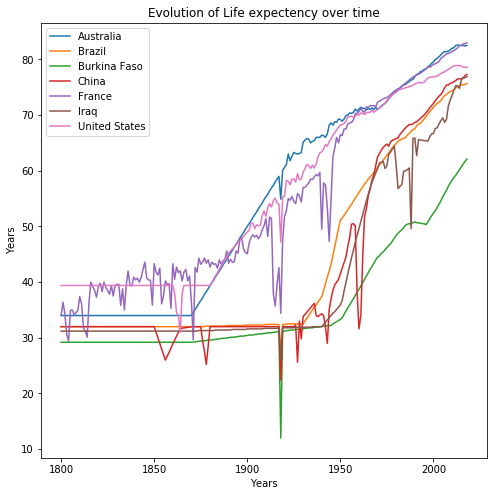

In [19]:
fig = plt.figure(figsize=(8, 8))

for country in countries_to_plot:
    plt.plot(df_life_exp.columns, df_life_exp.loc[country], label=country);
plt.legend();
plt.title("Evolution of Life expectency over time");
plt.xlabel("Years");
plt.ylabel("Years");

In [20]:
df_life_exp.loc[countries_to_plot].transpose().describe()

country,Australia,Brazil,Burkina Faso,China,France,Iraq,United States
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,54.372603,43.134703,35.704566,41.987215,54.005023,40.792237,54.883562
std,18.052085,15.750797,9.668922,16.349167,16.174065,14.877305,15.233136
min,34.000000,27.400000,12.000000,22.400000,29.400000,26.300000,31.000000
25%,34.000000,32.000000,29.200000,32.000000,40.350000,31.200000,39.400000
50%,54.800000,32.300000,30.700000,32.000000,48.000000,31.600000,51.800000
75%,71.100000,57.800000,40.800000,52.500000,71.250000,52.750000,70.400000
max,82.600000,75.700000,62.100000,77.300000,83.000000,76.900000,78.900000


Life expectency Analysis

### Research Question 2  (Replace this header name!)

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!